In [218]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

In [5]:
urban_population = pd.read_csv('C:\\Users\\rayde\\iCloudDrive\\GitHub\\Python\\Data Project\\share-of-population-urban.csv')

In [6]:
income_taxes = pd.read_csv("C:\\Users\\rayde\\iCloudDrive\\GitHub\\Python\\Data Project\\taxes-on-incomes-of-individuals-and-corporations-gdp.csv")

In [7]:
urban_population.columns

Index(['Entity', 'Code', 'Year', 'Urban_Population'], dtype='object')

In [8]:
income_taxes.columns

Index(['Entity', 'Code', 'Year', 'Tax_Percent_GDP'], dtype='object')

In [9]:
urban_population.describe()

,Year
count,15072.000000
mean,1988.545382
std,16.737532
min,1960.000000
25%,1974.000000
50%,1989.000000
75%,2003.000000
max,2017.000000


In [10]:
income_taxes.describe()

,Year,Tax_Percent_GDP
count,4871.000000,4871.000000
mean,2000.872716,6.538407
std,9.803376,4.915040
min,1980.000000,0.000000
25%,1994.000000,2.903660
50%,2001.000000,5.455395
75%,2009.000000,8.992646
max,2017.000000,32.075305


In [11]:
urban_population.head()

,Entity,Code,Year,Urban_Population
0,Afghanistan,AFG,1960,8.401
1,Afghanistan,AFG,1961,8.684
2,Afghanistan,AFG,1962,8.976
3,Afghanistan,AFG,1963,9.276
4,Afghanistan,AFG,1964,9.586


In [12]:
income_taxes.head()

,Entity,Code,Year,Tax_Percent_GDP
0,Afghanistan,AFG,2003,0.165953
1,Afghanistan,AFG,2004,0.411647
2,Afghanistan,AFG,2005,0.320864
3,Afghanistan,AFG,2006,1.261181
4,Afghanistan,AFG,2007,1.323461


In [13]:
urban_population[['Entity', 'Urban_Population']].groupby('Entity').count()

,Urban_Population
Entity,
43hj43,1
43hu,1
Afghanistan,56
Albania,57
Algeria,58
...,...
rehojher,1
rreji43,1
shrjehr,1


In [14]:
urban_population['Entity'].unique()

array(['Afghanistan', 'x', 'Albania', 'sjke', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'rehojher', 'Antigua and Barbuda',
       'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'shrjehr', 'Austria', 'Azerbaijan', 'Bahamas', 'rreji43',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', '43hj43',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'herger', 'Bosnia and Herzegovina', 'Botswana', 'ho4u3h', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', '43hu', 'Cameroon', 'Canada', 'Cape Verde',
       'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Curacao', 'Cyprus', 'Czech Republic',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Domini

In [15]:
urban_population[['Code', 'Urban_Population']].groupby('Code').count()

,Urban_Population
Code,
ABW,58
AFG,58
AGO,58
ALB,58
AND,58
...,...
WSM,58
YEM,58
ZAF,58


In [16]:
urban_population[['Year', 'Urban_Population']].groupby('Year').count().head()

,Urban_Population
Year,
1960,259
1961,259
1962,259
1963,259
1964,259


In [17]:
income_taxes[['Code', 'Tax_Percent_GDP']].groupby('Code').count()

,Tax_Percent_GDP
Code,
ABW,25
AFG,15
AGO,15
AIA,15
ALB,21
...,...
WSM,22
YEM,15
ZAF,32


In [18]:
income_taxes[['Entity', 'Tax_Percent_GDP']].groupby('Entity').count()

,Tax_Percent_GDP
Entity,
Afghanistan,15
Albania,21
Algeria,2
Angola,15
Anguilla,15
...,...
Venezuela,38
Vietnam,21
Yemen,15


#### Merge the two datasets such that the resultant dataset contains only the intersection of the rows present in both files.

In [19]:
merged = pd.merge(urban_population, income_taxes, how='inner', on=['Entity', 'Code', 'Year'])

In [20]:
merged.columns

Index(['Entity', 'Code', 'Year', 'Urban_Population', 'Tax_Percent_GDP'], dtype='object')

In [21]:
merged.describe()

,Year,Tax_Percent_GDP
count,4822.000000,4822.000000
mean,2000.815844,6.541968
std,9.825130,4.914286
min,1980.000000,0.000000
25%,1994.000000,2.913589
50%,2001.000000,5.453532
75%,2009.000000,8.964636
max,2017.000000,32.075305


In [22]:
merged['Entity'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chile', 'China', 'Comoros', 'Congo',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji',
       'Finland', 'France', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'I

In [23]:
merged['Code'].unique()

array(['AFG', 'ALB', 'DZA', 'AGO', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS',
       'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ',
       'BEN', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR', 'BFA',
       'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CAF', 'CHL', 'CHN', 'COM',
       'COG', 'CRI', 'CIV', 'HRV', 'CUB', 'CYP', 'CZE', 'COD', 'DNK',
       'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST',
       'FJI', 'FIN', 'FRA', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRD',
       'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL',
       'IND', 'IDN', 'IRN', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR',
       'KAZ', 'KEN', 'KIR', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO',
       'LBY', 'LTU', 'LUX', 'MAC', 'MKD', 'MDG', 'MWI', 'MYS', 'MDV',
       'MLI', 'MLT', 'MHL', 'MRT', 'MUS', 'MEX', 'FSM', 'MDA', 'MNG',
       'MNE', 'MAR', 'MOZ', 'MMR', 'NAM', 'NPL', 'NLD', 'NZL', 'NIC',
       'NER', 'NGA', 'NOR', 'OMN', 'PAK', 'PLW', 'PSE', 'PAN', 'PNG',
       'PRY', 'PER',

In [24]:
merged['Year'].unique()

array([2003, 2004, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 1992, 1993, 1997, 1998, 1999, 2000, 2001, 2002,
       1994, 1995, 1996, 2005, 1990, 1991, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989], dtype=int64)

#### Export the results to a new file called merged_social_data.csv.

In [25]:
merged.to_csv('merged_social_data.csv')

#### Using the merged results, generate an ordinary least squares regression showing the effect of the independent variable Urban_Population on the dependent variable Tax_Percent_GDP.

###### a. The R squared of the results: .189
###### b. The t-statistic and p-value of the coefficient and intercept: {Urban_Population: {tstat:33.507 , pvalue:0.0 }, Intercept: {tstat:10.797, pvalue:0.0}
###### c. Degrees of freedom: 1
###### d. The spread of the residuals: -10.422492141267965 - 23.787454001985385


In [26]:
merged.dtypes

Entity               object
Code                 object
Year                  int64
Urban_Population     object
Tax_Percent_GDP     float64
dtype: object

In [27]:
merged.iloc[38]

Entity              Angola
Code                   AGO
Year                  1994
Urban_Population       43%
Tax_Percent_GDP       18.8
Name: 38, dtype: object

In [28]:
merged['Urban_Population'] = merged['Urban_Population'].apply(lambda x: x.strip('%'))

In [29]:
merged.iloc[38]

Entity              Angola
Code                   AGO
Year                  1994
Urban_Population        43
Tax_Percent_GDP       18.8
Name: 38, dtype: object

In [89]:
merged['Year_Code'] = 0
merged['Year_Code'] = merged['Year'].astype(str) + "_" + merged['Code'].astype(str)

In [90]:
obj_cols = ['Year', 'Code', 'Year_Code']
label_encoder = LabelEncoder()
for col in obj_cols:
    try:
        merged[col+"_dummy"] = label_encoder.fit_transform(merged[col])
    except:
        print('problem with' + col)

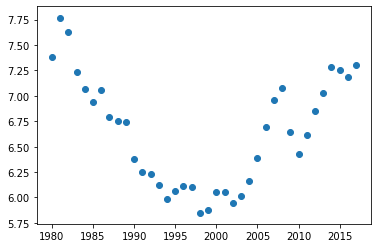

In [113]:
scatter = merged[['Year','Tax_Percent_GDP']].groupby('Year').mean()
plt.scatter(scatter.index, scatter['Tax_Percent_GDP'])

In [176]:
merged['Year19601994'] = 0
merged.loc[merged['Year'] <1995, 'Year19601994'] = merged['Year']

In [177]:
merged['Year19952004'] = 0
merged.loc[(merged['Year'] > 1994) & (merged['Year'] < 2005), 'Year19952004'] = merged['Year']

In [178]:
merged['Year20052017'] = 0
merged.loc[merged['Year'] > 2004, 'Year20052017'] = merged['Year']

In [199]:
merged['YearDummy_3Cat'] = 0
merged.loc[(merged['Year'] > 1994) & (merged['Year'] < 2005), 'YearDummy_3Cat'] = 1
merged.loc[merged['Year'] > 2004, 'YearDummy_3Cat'] = 2

In [202]:
merged[['Year','Year20052017','Year19952004','Year19601994', 'YearDummy_3Cat']].head()

,Year,Year20052017,Year19952004,Year19601994,YearDummy_3Cat
0,2003,0,2003,0,1
1,2004,0,2004,0,1
2,2006,2006,0,0,2
3,2007,2007,0,0,2
4,2008,2008,0,0,2


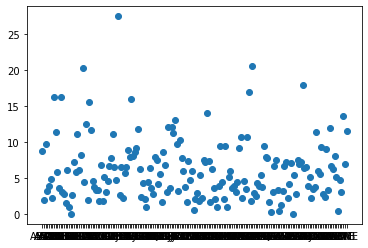

In [180]:
scatter = merged[['Code','Tax_Percent_GDP']].groupby('Code').mean()
plt.scatter(scatter.index, scatter['Tax_Percent_GDP'])

In [181]:
merged['Urban_Population'] = merged['Urban_Population'].astype('float64')

In [182]:
merged.columns

Index(['Entity', 'Code', 'Year', 'Urban_Population', 'Tax_Percent_GDP',
       'Year_dummy', 'Code_dummy', 'const', 'Year_Code', 'Year_Code_dummy',
       'Year-sq', 'Year19801994', 'Year19952004', 'Year20052015',
       'Year19601994', 'Year20052017'],
      dtype='object')

In [206]:
res = smf.ols(formula='Tax_Percent_GDP ~ Urban_Population + C(YearDummy_3Cat)', data=merged).fit()

In [207]:
merged.Year.sort_values().unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017], dtype=int64)

In [208]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Tax_Percent_GDP   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sat, 30 Jan 2021   Prob (F-statistic):          1.97e-223
Time:                        14:47:50   Log-Likelihood:                -14003.
No. Observations:                4822   AIC:                         2.801e+04
Df Residuals:                    4818   BIC:                         2.804e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2.0822      0.183     11.361      0.000       1.723       2.442
C(YearDummy_3Cat)[T.1]    -0.7767      0.164     -4.739      0.000      -1.098      -0.455
C(YearDummy_3Cat)[T.2]    -0.3127      0.159     -1.969      0.049      -0.624      -0.001
Urban_Population           0.0887      0.003     33.407      0.000       0.084       0.094
==============================================================================
Omnibus:                      876.416   Durbin-Watson:                   0.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2153.342
Skew:                           1.008   Prob(JB):                         0.00
Kurtosis:                       5.579   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [215]:
influence = OLSInfluence(results)

In [216]:
print(influence.resid.min() , "-" , influence.resid.max())

-10.48669744814092 - 23.874652683407696


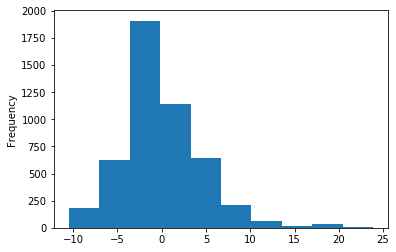

In [217]:
influence.resid.plot.hist()

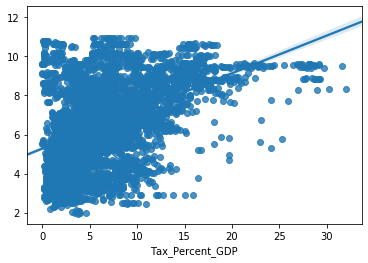

In [226]:
sns.regplot(merged['Tax_Percent_GDP'], res.predict(merged[['Urban_Population', 'YearDummy_3Cat']]))

In [229]:
res = smf.ols(formula='Tax_Percent_GDP ~ Urban_Population + C(Year)', data=merged).fit()

In [230]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Tax_Percent_GDP   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     30.70
Date:                Sat, 30 Jan 2021   Prob (F-statistic):          4.19e-195
Time:                        15:23:54   Log-Likelihood:                -13993.
No. Observations:                4822   AIC:                         2.806e+04
Df Residuals:                    4783   BIC:                         2.832e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.5526      0.585      4.365      0.000       1.406       3.699
C(Year)[T.1981]      0.2722      0.804      0.338      0.735      -1.305       1.849
C(Year)[T.1982]      0.2778      0.792      0.351      0.726      -1.274       1.830
C(Year)[T.1983]      0.0851      0.772      0.110      0.912      -1.429       1.599
C(Year)[T.1984]     -0.0942      0.767     -0.123      0.902      -1.599       1.410
C(Year)[T.1985]     -0.1809      0.765     -0.236      0.813      -1.681       1.319
C(Year)[T.1986]     -0.0963      0.765     -0.126      0.900      -1.596       1.404
C(Year)[T.1987]     -0.3156      0.754     -0.419      0.676      -1.794       1.163
C(Year)[T.1988]     -0.3655      0.752     -0.486      0.627      -1.840       1.109
C(Year)[T.1989]     -0.3378      0.742     -0.455      0.649      -1.793       1.118
C(Year)[T.1990]     -0.7535      0.716     -1.052      0.293      -2.157       0.650
C(Year)[T.1991]     -0.8570      0.709     -1.210      0.227      -2.246       0.532
C(Year)[T.1992]     -0.7336      0.693     -1.059      0.290      -2.092       0.625
C(Year)[T.1993]     -0.8972      0.682     -1.316      0.188      -2.234       0.439
C(Year)[T.1994]     -1.1134      0.679     -1.640      0.101      -2.444       0.217
C(Year)[T.1995]     -1.0791      0.671     -1.608      0.108      -2.395       0.237
C(Year)[T.1996]     -1.0659      0.671     -1.588      0.112      -2.382       0.250
C(Year)[T.1997]     -1.0855      0.666     -1.629      0.103      -2.392       0.221
C(Year)[T.1998]     -1.3553      0.665     -2.038      0.042      -2.659      -0.051
C(Year)[T.1999]     -1.3400      0.666     -2.013      0.044      -2.645      -0.035
C(Year)[T.2000]     -1.2089      0.664     -1.821      0.069      -2.511       0.093
C(Year)[T.2001]     -1.2107      0.664     -1.823      0.068      -2.512       0.091
C(Year)[T.2002]     -1.3846      0.662     -2.090      0.037      -2.683      -0.086
C(Year)[T.2003]     -1.3405      0.663     -2.021      0.043      -2.641      -0.040
C(Year)[T.2004]     -1.2344      0.664     -1.859      0.063      -2.536       0.067
C(Year)[T.2005]     -1.0288      0.669     -1.539      0.124      -2.340       0.282
C(Year)[T.2006]     -0.7827      0.667     -1.173      0.241      -2.091       0.526
C(Year)[T.2007]     -0.5948      0.669     -0.889      0.374      -1.907       0.717
C(Year)[T.2008]     -0.5670      0.671     -0.846      0.398      -1.882       0.747
C(Year)[T.2009]     -1.0204      0.671     -1.522      0.128      -2.335       0.294
C(Year)[T.2010]     -1.2008      0.671     -1.789      0.074      -2.517       0.115
C(Year)[T.2011]     -1.0531      0.671     -1.569      0.117      -2.369       0.263
C(Year)[T.2012]     -0.8577      0.674     -1.272      0.204      -2.180       0.465
C(Year)[T.2013]     -0.

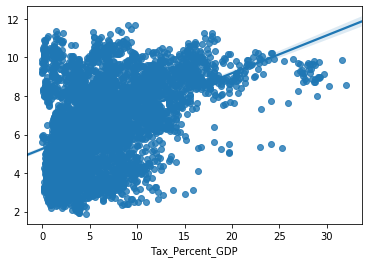

In [231]:
sns.regplot(merged['Tax_Percent_GDP'], res.predict(merged[['Urban_Population', 'Year']]))

In [ ]:
res = smf.ols(formula='Tax_Percent_GDP ~ Urban_Population + C(Year)', data=merged).fit()

#### Summarize your results (in the file you made above or a separate document) based on the output of the model. Be sure to describe the relationship between the independent and dependent variable and your interpretation of its significance.

##### Answer the free-form analysis questions below. Note that there are not inherently right or wrong answers; the questions are meant for you to showcase your ability to interpret and understand data:
######    a. What were some challenges you encountered in generating the dataset for analysis, if any?
######    b. Based on this initial model, what steps might you take next to validate or extend your analysis, if any?
######    c. If you were asked to study this relationship, how would you convey your findings?